 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [186]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [260]:
# Reading whale returns
whaleCsv = 'whale_returns.csv'
whale_pd = pd.read_csv(whaleCsv)

# convert the datetime format
whale_pd['Date'] = pd.to_datetime(whale_pd['Date'], format='%Y-%m-%d')

# set the date as an index
whale_pd.set_index('Date', inplace=True)

# sort the index ascending
whale_pd.sort_index(inplace=True)

# print
print(whale_pd.head())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  


In [261]:
# Count nulls
whale_null_count = whale_pd.isnull().sum()
whale_null_count.head()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [262]:
# Drop nulls
whale_returns = whale_pd.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [281]:
# Reading algorithmic returns
algoCsv = 'algo_returns.csv'
algo_pd = pd.read_csv(algoCsv)

algo_pd['Date'] = pd.to_datetime(algo_pd['Date'], format='%Y-%m-%d')
algo_pd.set_index('Date', inplace=True)
algo_pd.sort_index(inplace=True)

print(algo_pd.head())

              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN


In [282]:
# Count nulls
algo_null_count = algo_pd.isnull().sum()
algo_null_count.head()

Algo 1    0
Algo 2    6
dtype: int64

In [283]:
# Drop nulls
algo_returns = algo_pd.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [284]:
# Reading S&P 500 Closing Prices
sp500Csv = 'sp500_history.csv'
sp500_pd = pd.read_csv(sp500Csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_pd.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [285]:
# Check Data Types
# Check data types of the DataFrame columns
print(sp500_pd.dtypes)


Close    object
dtype: object


In [286]:
# Fix Data Types
sp500_pd['Close'] = sp500_pd['Close'].str.replace('$', '', regex=False)

sp500_pd['Close'] = pd.to_numeric(sp500_pd['Close'])




In [287]:
# Calculate Daily Returns

sp500_daily = sp500_pd.pct_change()

print(sp500_daily)

               Close
Date                
2019-04-23       NaN
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
...              ...
2012-10-05  0.003469
2012-10-04  0.000322
2012-10-03 -0.007123
2012-10-02 -0.003611
2012-10-01 -0.000872

[1649 rows x 1 columns]


In [288]:
# Drop nulls
sp500_daily = sp500_daily.dropna()
print(sp500_daily)

               Close
Date                
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
2019-04-15 -0.000509
...              ...
2012-10-05  0.003469
2012-10-04  0.000322
2012-10-03 -0.007123
2012-10-02 -0.003611
2012-10-01 -0.000872

[1648 rows x 1 columns]


In [367]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily = sp500_daily.rename(columns={'Close': 'SP500 Daily Returns'})

print(sp500_daily_col)

            SP500 Daily Returns
Date                           
2019-04-22            -0.008764
2019-04-18            -0.001011
2019-04-17            -0.001577
2019-04-16             0.002279
2019-04-15            -0.000509
...                         ...
2012-10-05             0.003469
2012-10-04             0.000322
2012-10-03            -0.007123
2012-10-02            -0.003611
2012-10-01            -0.000872

[1648 rows x 1 columns]


## Combine Whale, Algorithmic, and S&P 500 Returns

In [368]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([sp500_daily_col, algo_returns, whale_returns], axis='columns', join='inner')
combine = combined_returns.dropna()
print(combine)

            SP500 Daily Returns    Algo 1    Algo 2  \
Date                                                  
2019-04-22            -0.008764  0.000677 -0.001936   
2019-04-18            -0.001011 -0.000588 -0.001229   
2019-04-17            -0.001577 -0.010301 -0.005228   
2019-04-16             0.002279 -0.006945  0.002899   
2019-04-15            -0.000509 -0.004331 -0.004572   
...                         ...       ...       ...   
2015-03-09             0.017254 -0.005447  0.001303   
2015-03-06            -0.003929 -0.004957 -0.011460   
2015-03-05             0.014378 -0.000955  0.004323   
2015-03-04            -0.001195 -0.008589  0.002416   
2015-03-03             0.004408 -0.001942 -0.000949   

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-22                  -0.002586           -0.007333   
2019-04-18                   0.001448            0.001222   
2019-04-17                  -0.002897   

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

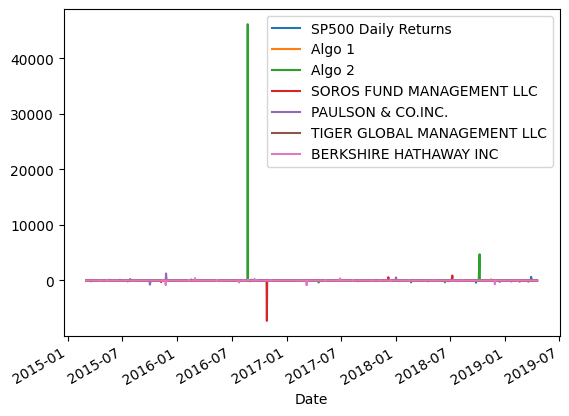

In [369]:
# Plot daily returns of all portfolios
combined_daily = combine.pct_change()
combined_daily_drop = combined_daily.dropna()
combined_daily_drop.head()

combined_daily_drop.plot()

#### Calculate and Plot cumulative returns.

C:\Users\Name\anaconda3\envs\dev\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


<Axes: xlabel='Date'>

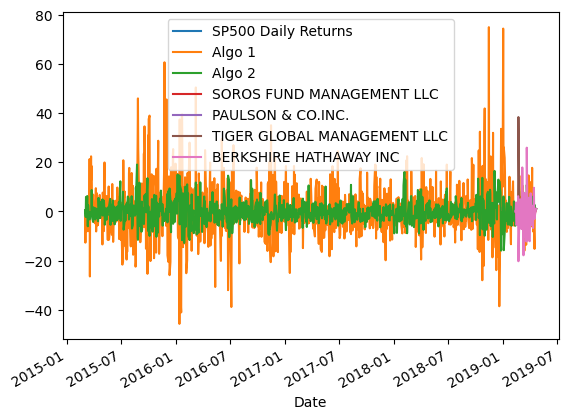

In [370]:
# Calculate cumulative returns of all portfolios

combined_daily_filled = combined_daily.fillna(0)

cumulative_returns = (1 + combined_daily_filled).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


C:\Users\Name\anaconda3\envs\dev\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


<Axes: >

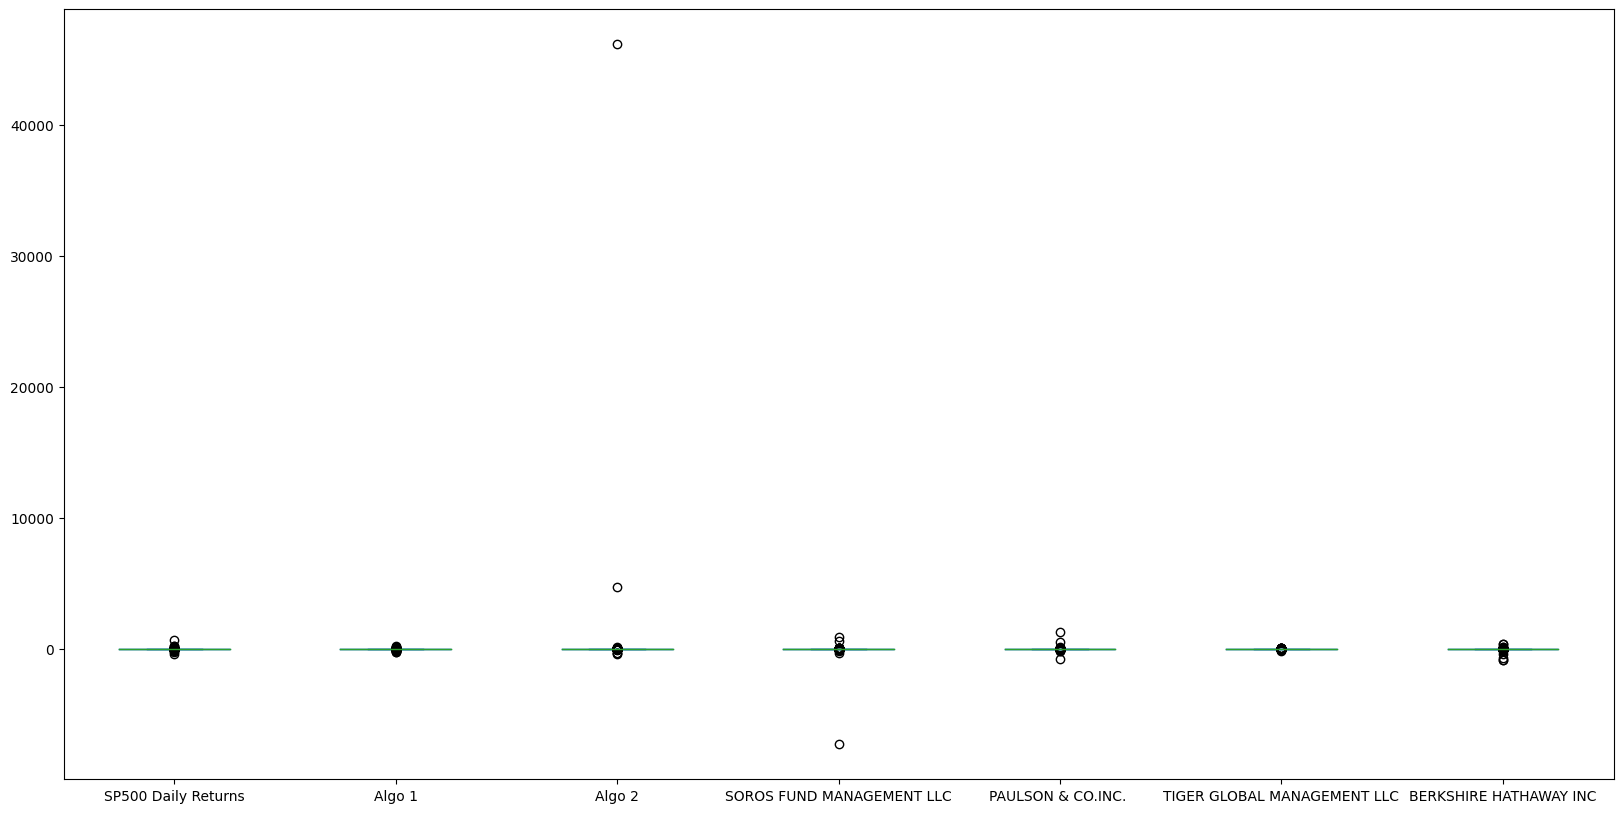

In [371]:
# Box plot to visually show risk

combined_daily.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [372]:
# Calculate the daily standard deviations of all portfolios
# combined_std = combined_daily_drop.std()
# combined_std.head()

# Calculate the standard deviations
algo_std = algo_returns.std()
whale_std = whale_returns.std()

# Display the standard deviations
print("Algo Standard Deviation:")
print(algo_std.head())

print("\nWhale Standard Deviation:")
print(whale_std.head())


Algo Standard Deviation:
Algo 1    0.007988
Algo 2    0.008466
dtype: float64

Whale Standard Deviation:
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [373]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_daily.std()
sp500_std.head()


# Determine which portfolios are riskier than the S&P 500
# Tiger Global, Berkshire Hathaway, and Algo 2 are riskier than the S&P500

SP500 Daily Returns    0.008135
dtype: float64

### Calculate the Annualized Standard Deviation

In [374]:
# Calculate the annualized standard deviation (252 trading days)
# Calculate the annualized standard deviation (252 trading days)
sp500_std_annual = sp500_daily.std() * np.sqrt(252)
algo_std_annual = algo_returns.std() * np.sqrt(252)
whale_std_annual = whale_returns.std() * np.sqrt(252)

# Display the annualized standard deviations
print("SP500 Annualized Standard Deviation:")
print(sp500_std_annual.head())

print("\nAlgo Annualized Standard Deviation:")
print(algo_std_annual.head())

print("\nWhale Annualized Standard Deviation:")
print(whale_std_annual.head())




SP500 Annualized Standard Deviation:
SP500 Daily Returns    0.129133
dtype: float64

Algo Annualized Standard Deviation:
Algo 1    0.126801
Algo 2    0.134401
dtype: float64

Whale Annualized Standard Deviation:
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

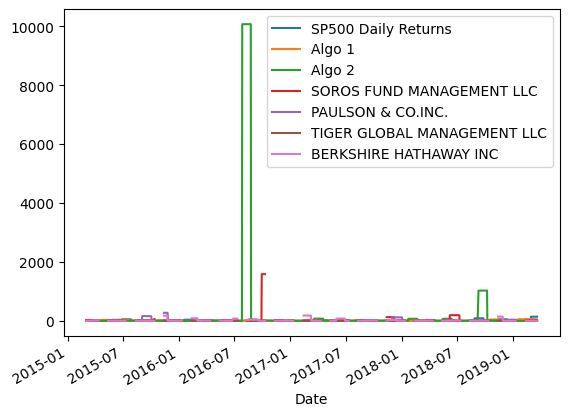

In [375]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Calculate the rolling standard deviation with a 21-day window
rolling_std = combined_daily.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot()
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [376]:
# Calculate the correlation
# Calculate the correlation matrix
correlation_matrix = combined_daily.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                             SP500 Daily Returns    Algo 1    Algo 2  \
SP500 Daily Returns                     1.000000  0.004853  0.000508   
Algo 1                                  0.004853  1.000000 -0.004747   
Algo 2                                  0.000508 -0.004747  1.000000   
SOROS FUND MANAGEMENT LLC              -0.025987 -0.000766  0.003728   
PAULSON & CO.INC.                       0.000276 -0.012381  0.001201   
TIGER GLOBAL MANAGEMENT LLC            -0.014570 -0.002218  0.004498   
BERKSHIRE HATHAWAY INC                 -0.006658  0.098417  0.004929   

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SP500 Daily Returns                          -0.025987            0.000276   
Algo 1                                       -0.000766           -0.012381   
Algo 2                                        0.003728            0.001201   
SOROS FUND MANAGEMENT LLC                     1.000000           -0.000643   
PAULSON & CO.

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [381]:
# Calculate covariance of a single portfolio
covariance = algo_returns.cov(sp500_daily)

# Calculate variance of S&P 500
variance_sp500 = sp500_daily.var()

# Computing beta
beta = covariance / variance_sp500

# Plot beta trend
beta.plot()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!